In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from PIL import Image

In [2]:
# 이미지 데이터 전처리를 위한 생성자를 정의합니다. rescale 파라미터를 통해 이미지 픽셀 값을 0~1 사이로 스케일링합니다.
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# 'dataset_fog/train' 디렉토리에서 이미지를 불러와 전처리하고, 학습 데이터를 생성합니다.
# target_size는 입력 이미지의 크기를 정의하며, batch_size는 한 번에 처리할 이미지의 수를 정의합니다.
# class_mode는 라벨의 형태를 결정하며, 'binary'는 이진 분류를 의미합니다.
train_generator = train_datagen.flow_from_directory(
    'dataset_fog/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 'dataset_fog/test' 디렉토리에서 이미지를 불러와 전처리하고, 검증 데이터를 생성합니다.
# 설정값은 학습 데이터와 동일합니다.
validation_generator = test_datagen.flow_from_directory(
    'dataset_fog/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 2622 images belonging to 2 classes.
Found 726 images belonging to 2 classes.


In [3]:
# Sequential 모델 객체를 생성합니다. Sequential 모델은 층을 순서대로 쌓아 구성합니다.
model = Sequential()

# 첫 번째 Conv2D 층을 추가합니다. 32개의 필터를 사용하고, 각 필터의 크기는 3x3입니다.
# input_shape는 입력 이미지의 형태를 정의합니다. 여기서는 150x150 크기의 RGB 이미지를 입력으로 받습니다.
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))

# ReLU 활성화 함수를 적용합니다.
model.add(Activation('relu'))

# 2x2 크기의 MaxPooling을 수행하여 이미지의 크기를 줄입니다.
model.add(MaxPooling2D(pool_size=(2, 2)))

# 두 번째 Conv2D 층을 추가합니다. 설정은 첫 번째 층과 동일하나, 입력 이미지의 형태를 따로 명시하지 않습니다.
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 세 번째 Conv2D 층을 추가합니다. 이번에는 64개의 필터를 사용합니다.
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten 층을 추가하여 3차원 텐서를 1차원 텐서로 변환합니다.
model.add(Flatten())

# Dense 층을 추가하여 64개의 출력 뉴런을 가진 완전 연결 층을 생성합니다.
model.add(Dense(64))
model.add(Activation('relu'))

# Dropout 층을 추가하여 과적합을 방지합니다. 50%의 뉴런을 무작위로 꺼냅니다.
model.add(Dropout(0.5))

# 최종 출력 층을 추가합니다. 이진 분류를 수행하므로 1개의 뉴런만 사용합니다.
model.add(Dense(1))

# Sigmoid 활성화 함수를 적용하여 결과를 0~1 사이로 출력합니다.
model.add(Activation('sigmoid'))

# 모델을 컴파일합니다. 손실 함수로는 binary_crossentropy를, 최적화 알고리즘으로는 RMSprop를, 평가 메트릭으로는 정확도를 사용합니다.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 모델의 구조를 출력합니다.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

Epoch 1/50
81/81 [==============================] - 41s 505ms/step - loss: 0.2709 - accuracy: 0.9012 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 2/50
81/81 [==============================] - 39s 476ms/step - loss: 0.0592 - accuracy: 0.9849 - val_loss: 1.1867 - val_accuracy: 0.7202
Epoch 3/50
81/81 [==============================] - 38s 467ms/step - loss: 0.0491 - accuracy: 0.9846 - val_loss: 0.0454 - val_accuracy: 0.9886
Epoch 4/50
81/81 [==============================] - 38s 471ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.0284 - val_accuracy: 0.9872
Epoch 5/50
81/81 [==============================] - 38s 473ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.0458 - val_accuracy: 0.9844
Epoch 6/50
81/81 [==============================] - 38s 465ms/step - loss: 0.0583 - accuracy: 0.9834 - val_loss: 0.0266 - val_accuracy: 0.9901
Epoch 7/50
81/81 [==============================] - 38s 471ms/step - loss: 0.0382 - accuracy: 0.9896 - val_loss: 0.0568 - val_accuracy: 0.9730

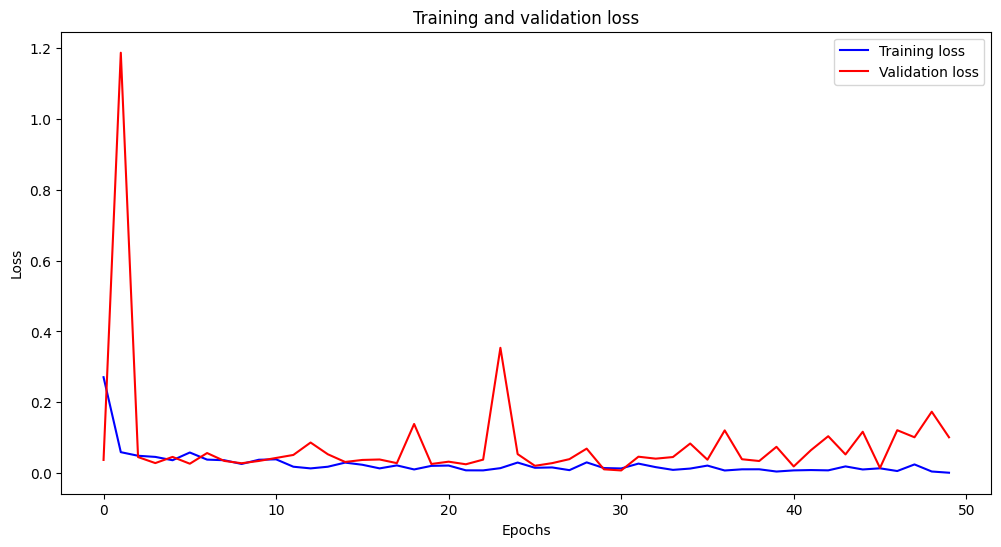

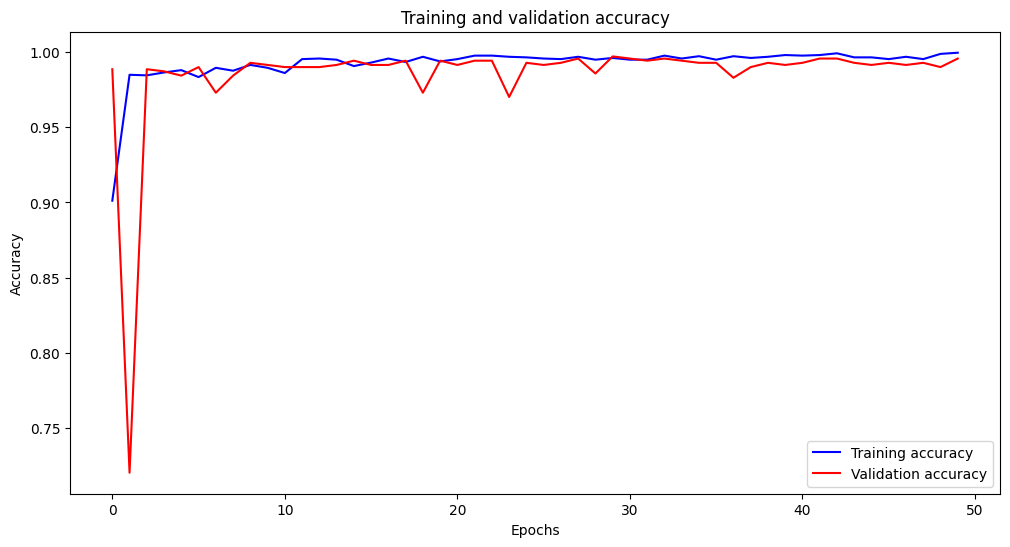

In [4]:
# 모델을 학습시킵니다. 학습 데이터로는 train_generator를, 검증 데이터로는 validation_generator를 사용합니다.
# steps_per_epoch는 한 에포크에 수행할 학습 스텝의 수를 정의하며, 여기서는 2622개의 이미지를 32개씩 묶어 학습하므로 2622 // 32를 사용합니다.
# validation_steps는 한 에포크에 수행할 검증 스텝의 수를 정의하며, 여기서는 726개의 이미지를 32개씩 묶어 검증하므로 726 // 32를 사용합니다.
# 총 50회의 에포크 동안 모델을 학습시킵니다.
history = model.fit(
    train_generator,
    steps_per_epoch=2622 // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=726 // 32
)

# 학습 과정의 손실 그래프를 그립니다.
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], 'b-', label='Training loss') # 학습 손실
plt.plot(history.history['val_loss'], 'r-', label='Validation loss') # 검증 손실
plt.title('Training and validation loss') # 그래프 제목
plt.xlabel('Epochs') # x축 라벨
plt.ylabel('Loss') # y축 라벨
plt.legend() # 범례 표시
plt.show() # 그래프 출력

# 학습 과정의 정확도 그래프를 그립니다.
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'b-', label='Training accuracy') # 학습 정확도
plt.plot(history.history['val_accuracy'], 'r-', label='Validation accuracy') # 검증 정확도
plt.title('Training and validation accuracy') # 그래프 제목
plt.xlabel('Epochs') # x축 라벨
plt.ylabel('Accuracy') # y축 라벨
plt.legend() # 범례 표시
plt.show() # 그래프 출력


In [5]:
model.save('fog_detection.h5')  # h5 확장자로 모델 저장

c:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# 'fog_test.png' 파일의 이미지를 불러오고, 이미지의 크기를 150x150으로 조정합니다.
test_image = tf.keras.preprocessing.image.load_img('data/fog_test/forest.jpg', target_size = (150, 150))

# 이미지 데이터를 numpy 배열로 변환합니다.
test_image = tf.keras.preprocessing.image.img_to_array(test_image)

# 이미지 데이터의 차원을 확장하여 모델의 입력 형태에 맞춥니다. 모델은 배치 입력을 기대하기 때문에 이 과정이 필요합니다.
test_image = np.expand_dims(test_image, axis = 0)

# 학습된 모델을 사용하여 이미지를 분류합니다.
result = model.predict(test_image)

# 결과를 해석합니다. 여기서는 1을 '안개 없음'으로, 그 외의 값을 '안개 있음'으로 해석합니다.
if result[0][0] == 1:
    prediction = '안개 없음'
else:
    prediction = '안개 있음'

# 예측 결과를 출력합니다.
print(prediction)


1/1 [==============================] - 0s 70ms/step
안개 있음


In [19]:
# 'dataset_fog/test/fog' 폴더의 모든 이미지를 불러옵니다.
test_folder = 'dataset_fog/test/fog'
test_images = os.listdir(test_folder)

# 정확한 예측의 수와 전체 이미지의 수를 초기화합니다.
correct = 0
total = len(test_images)

# 각 이미지에 대해 예측을 수행합니다.
for image_name in test_images:
    # 이미지의 경로를 생성합니다.
    image_path = os.path.join(test_folder, image_name)

    # 이미지를 불러오고, 이미지의 크기를 조절하며, numpy 배열로 변환합니다.
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size = (150, 150))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)

    # 이미지 데이터의 차원을 확장하여 모델의 입력 형태에 맞춥니다.
    test_image = np.expand_dims(test_image, axis = 0)

    # 모델을 사용하여 이미지를 분류합니다.
    result = model.predict(test_image)

    # 결과를 해석합니다. 여기서는 1을 '안개 없음'으로, 그 외의 값을 '안개 있음'으로 해석합니다.
    # 정답인 '안개 있음'을 예측한 경우, correct를 1 증가시킵니다.
    if result[0][0] != 1:
        correct += 1

# 정확도를 계산하고 출력합니다.
accuracy = correct / total
print(f"정확도: {accuracy * 100}%")


1/1 [==============================] - 0s 14ms/step
정확도: 99.48849104859335%


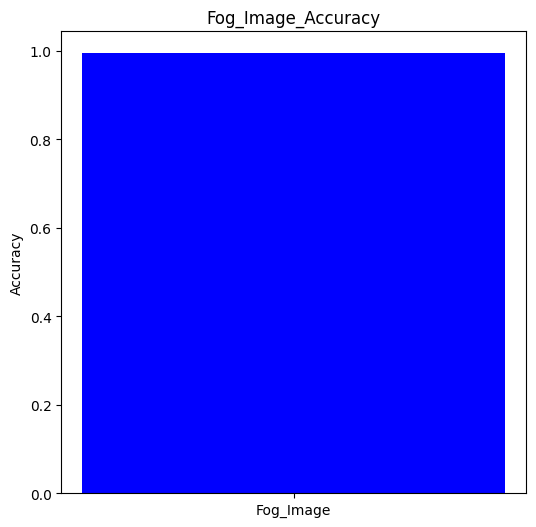

In [20]:
plt.figure(figsize=(6, 6))
plt.title("Fog_Image_Accuracy")
plt.bar("Fog_Image", [accuracy], color='blue')
plt.ylabel("Accuracy")
plt.show()

In [21]:
# 'dataset_fog/test/no_fog' 폴더의 모든 이미지를 불러옵니다.
test_folder = 'dataset_fog/test/no_fog'
test_images = os.listdir(test_folder)

# 정확한 예측의 수와 전체 이미지의 수를 초기화합니다.
correct = 0
total = len(test_images)

# 각 이미지에 대해 예측을 수행합니다.
for image_name in test_images:
    # 이미지의 경로를 생성합니다.
    image_path = os.path.join(test_folder, image_name)

    # 이미지를 불러오고, 이미지의 크기를 조절하며, numpy 배열로 변환합니다.
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size = (150, 150))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)

    # 이미지 데이터의 차원을 확장하여 모델의 입력 형태에 맞춥니다.
    test_image = np.expand_dims(test_image, axis = 0)

    # 모델을 사용하여 이미지를 분류합니다.
    result = model.predict(test_image)

    # 결과를 해석합니다. 여기서는 1을 '안개 없음'으로, 그 외의 값을 '안개 있음'으로 해석합니다.
    # 정답인 '안개 없음'을 예측한 경우, correct를 1 증가시킵니다.
    if result[0][0] == 1:
        correct += 1

# 정확도를 계산하고 출력합니다.
accuracy = correct / total
print(f"정확도: {accuracy * 100}%")

1/1 [==============================] - 0s 15ms/step
정확도: 99.1044776119403%


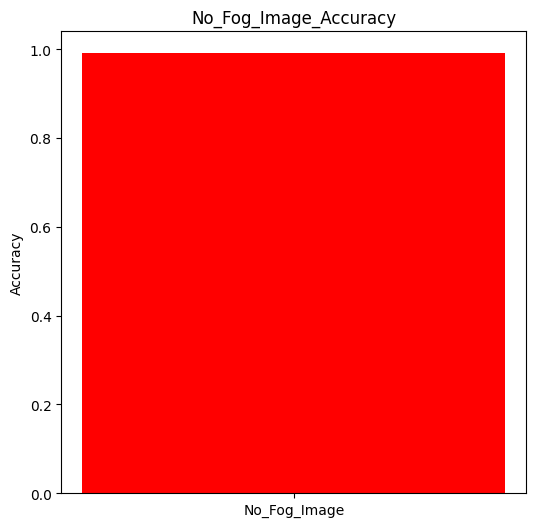

In [22]:
# 정확도를 바 차트로 시각화합니다.
plt.figure(figsize=(6, 6))
plt.title("No_Fog_Image_Accuracy")
plt.bar(["No_Fog_Image"], [accuracy], color='Red')  # 바 차트에 '안개 없음 이미지' 레이블을 추가합니다.
plt.ylabel("Accuracy")
plt.show()